In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_pumps_from_file(locatienaam):
    if locatienaam == 'rompert':
        text_file = open("pumps_for_Rompert.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'bokhoven':
        text_file = open("pumps_for_Bokhoven.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'haarsteeg':
        text_file = open("pumps_for_Haarsteeg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'helftheuvelweg':
        text_file = open("pumps_for_Helftheuvelweg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'maaspoort':
        text_file = open("pumps_for_Maaspoort.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'oudengelseweg':
        text_file = open("pumps_for_OudEngelseweg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    return(lines)

In [3]:
def read_raindata(path):
    df = pd.DataFrame()
    for file in os.listdir(path):
        file = path + '/' + file
        if len(df) == 0:
            df = pd.read_csv(file, header=2)
        else:
            newlines = pd.read_csv(file, header=2)
            df = df.append(newlines)
    
    df['Begin'] = pd.to_datetime(df['Begin'])
    df['Eind'] = pd.to_datetime(df['Eind'])
    df = df.set_index('Begin')
    df = df.sort_index()
    
    return df

In [4]:
def sum_pumps(df, pumplist):
    out = pd.DataFrame()
    for pump in pumplist:
        if len(out) == 0:
            out = df[pump].sort_index().groupby(pd.Grouper(level=0, freq='1H')).sum()
        else:
            out += df[pump].sort_index().groupby(pd.Grouper(level=0, freq='1H')).sum()
    return out

In [5]:
def get_dry_wet_times(df):
    Series_rolling_sum = df.rolling(12).sum()
    df_rolling_sum = pd.DataFrame(Series_rolling_sum)
    df_rolling_sum.columns = ['rain_sum']

    df_dry = df_rolling_sum[df_rolling_sum['rain_sum'] <= 0.05]
    df_rainy = df_rolling_sum[df_rolling_sum['rain_sum'] > 0.05]

    dry_times = df_dry.index.tolist()
    rainy_times = df_rainy.index.tolist()
    
    return(dry_times, rainy_times)

In [6]:
def write_dry_file(pump, title):
    with open(title, 'w') as f:
        for item in pump:
            f.write("%s\n" % item)

In [7]:
def rainWriter(name):
    df = read_raindata(path)
    pumps = read_pumps_from_file(name) 
    rainHourSum = sum_pumps(df, pumps)
    dry_times, rainy_times = get_dry_wet_times(rainHourSum)
    write_dry_file(dry_times, 'dry_{}'.format(name))
    return rainHourSum

In [8]:
path = "./data/sewer_data/rain_timeseries"
rompert = rainWriter('rompert')
bokhoven = rainWriter('bokhoven')
haarsteeg = rainWriter('haarsteeg')
helftheuvelweg = rainWriter('helftheuvelweg')
maaspoort = rainWriter('maaspoort')
oudengelseweg = rainWriter('oudengelseweg')

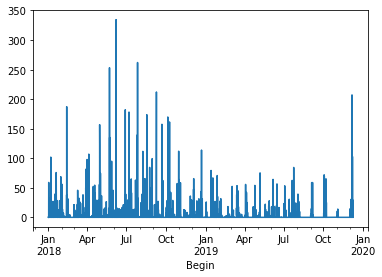

In [14]:
oudengelseweg.plot()